# Блок рекомендаций

Так как штука сама по себе объемная и загадочная, вынесу ее в отдельный блокнот. Мы снова подгрузим историии о транзакциях, попутаемся оценить, какие концерты пользоваались спросом, как то озарактеризовать этих людей, и понять, какие реальные маршруты у них по факту получились.

In [35]:
import pandas as pd
import numpy as np
import datetime

# Опишем пути к файлам
TRANSACTIONS_PATH = 'data_dirty/bd2022_06072022.xlsx'

In [36]:
transactions = pd.read_excel(TRANSACTIONS_PATH)

## Подготовка данных

В листе операций данных с избытком. НО не всякие нужны нам д ля оценки поведения. Для начала, уберем все возвраты, и оставим только идентифицируемые операции - те, что имею отднозначную связь с пользователем. А не куплены анонимно, например, в кассе.

In [37]:
#в названии концертов фестиваля Безумных дней указывается его порядковый номер. Разделим строку на номер и собственно название
qq = transactions['ShowName'].str.split('. ', n=1, expand = True)

transactions['ShowNum'] = pd.to_numeric(qq[0])
transactions['ShowName'] = qq[1]

# Назначим в качестве индекса номер концерта и отсортируем список.
concerts = transactions.set_index('ShowNum').sort_index()

In [38]:
# Операции возврата отложим отдельно
Vozvrat = transactions[transactions['Price'] < 0]
print(f'Всего операций возвратов в выгрузке: {len(Vozvrat)}')

#удалим операции возвратов, чтобы они не влияли на расчет средних значений (напрмиер цены билаов на этот концерт)
transactions = transactions.drop(transactions[transactions['Price'] < 0].index)


Всего операций возвратов в выгрузке: 26


In [ ]:
With_out_clients = transactions[transactions['ClientId'].isna()]

print(f'Количество операций без привязки к клиенту: {len(With_out_clients)}')

Кокличество операций без привязки к клиенту: 10512


In [50]:
# уберем пока из рассмотрения факультатиыне параметры с ряд\место, колчиества билетов и пр.
GoodOperetions = transactions[transactions['ClientId'] > 0].drop(['WebOrderId', 'Fest', 'TicketType', 'TicketNum', 'ZoneName', 'RowNum', 'SeatNum', 'Pushkin'], axis=1).set_index('ClientId').sort_index()
GoodOperetions.to_excel('data_clean/GoodOperetions.xlsx')
GoodOperetions

,OpId,OpDate,HallName,ShowDate,ShowName,ShowId,Genre,Price,ShowNum
ClientId,,,,,,,,,
1.0,31844,2022-04-30 17:59:54,ТЮЗ - Большой,2022-07-01 19:45:00,Фламенко в ритме сердца,17,Танец,200,26
1.0,31827,2022-04-30 17:56:59,Большой зал филармонии,2022-07-02 22:15:00,Ночной орган и японская флейта,35,Орган и солисты,200,69
1.0,31828,2022-04-30 17:56:59,Большой зал филармонии,2022-07-02 22:15:00,Ночной орган и японская флейта,35,Орган и солисты,200,69
1.0,31843,2022-04-30 17:59:54,ТЮЗ - Большой,2022-07-01 19:45:00,Фламенко в ритме сердца,17,Танец,200,26
190.0,91758,2022-06-30 18:52:03,Большой зал филармонии,2022-07-02 17:15:00,Симфония радости,33,Симфонический оркестр,200,56
...,...,...,...,...,...,...,...,...,...
99984.0,99141,2022-07-03 13:09:43,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86
99988.0,99163,2022-07-03 13:34:41.037,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86
99988.0,99164,2022-07-03 13:34:41.043,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86


In [53]:
GoodOperetions.reset_index().groupby(['ClientId', 'ShowNum']).count()['OpId'].head(20)

ClientId  ShowNum
1.0       26         2
          69         2
190.0     56         1
198.0     4          2
          10         1
          80         2
218.0     25         2
          32         2
          39         2
          42         2
238.0     10         1
283.0     1          1
288.0     1          1
          60         2
          80         1
309.0     4          2
          42         2
          98         2
327.0     21         2
          26         2
Name: OpId, dtype: int64

In [59]:
GoodOperetions = GoodOperetions.reset_index()
GoodOperetions

,ClientId,OpId,OpDate,HallName,ShowDate,ShowName,ShowId,Genre,Price,ShowNum
0,1.0,31844,2022-04-30 17:59:54,ТЮЗ - Большой,2022-07-01 19:45:00,Фламенко в ритме сердца,17,Танец,200,26
1,1.0,31827,2022-04-30 17:56:59,Большой зал филармонии,2022-07-02 22:15:00,Ночной орган и японская флейта,35,Орган и солисты,200,69
2,1.0,31828,2022-04-30 17:56:59,Большой зал филармонии,2022-07-02 22:15:00,Ночной орган и японская флейта,35,Орган и солисты,200,69
3,1.0,31843,2022-04-30 17:59:54,ТЮЗ - Большой,2022-07-01 19:45:00,Фламенко в ритме сердца,17,Танец,200,26
4,190.0,91758,2022-06-30 18:52:03,Большой зал филармонии,2022-07-02 17:15:00,Симфония радости,33,Симфонический оркестр,200,56
...,...,...,...,...,...,...,...,...,...,...
25825,99984.0,99141,2022-07-03 13:09:43,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86
25826,99988.0,99163,2022-07-03 13:34:41.037,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86
25827,99988.0,99164,2022-07-03 13:34:41.043,ТЮЗ - Большой,2022-07-03 14:30:00,Пляж на Лебедином озере,88,Камерные программы,200,86
25828,100009.0,75643,2022-06-18 21:49:16,Большой зал филармонии,2022-07-02 15:00:00,Неоконченная,32,Симфонический оркестр,200,49


In [60]:
# Построим бинарную матрицу: строки — пользователи, колонки — концерты
user_item_matrix = pd.crosstab(GoodOperetions['ClientId'], GoodOperetions['ShowId'])
user_item_matrix

# # Сохраняем результат (опционально)
# user_item_matrix.to_csv("user_item_matrix.csv")

ShowId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
ClientId,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218.0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99983.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99984.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Item-based рекомендации на основе co-visitation.

Для каждого концерта (ShowId) определим, какие другие концерты чаще всего посещались теми же пользователями.

*Например:*
если 100 человек были на концерте 35, и 50 из них также были на концерте 17,
→ значит 17 — хороший кандидат в рекомендацию к 35.

Сейчас построим:

* Матрицу соприсутствия (co-visitation): concert_i × concert_j

* Для каждого концерта — топ-N связанных концертов

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# === Косинусное сходство между концертами ===
# Столбцы — концерты, строки — пользователи
item_item_sim = cosine_similarity(user_item_matrix.T)

# Оформим в DataFrame
concert_ids = user_item_matrix.columns
item_sim_df = pd.DataFrame(item_item_sim, index=concert_ids, columns=concert_ids)

# === Построим top-N рекомендации для каждого концерта ===
top_n = 5  # можно изменить
recommendations = {
    concert: item_sim_df[concert]
        .drop(concert)  # исключаем сам концерт
        .sort_values(ascending=False)
        .head(top_n)
        .index.tolist()
    for concert in concert_ids
}

# === Пример вывода: рекомендации для первых 5 концертов ===
for concert in list(recommendations.keys())[:5]:
    print(f"🎵 Концерт {concert} → рекомендовать: {recommendations[concert]}")


🎵 Концерт 1 → рекомендовать: [71, 30, 38, 2, 7]
🎵 Концерт 2 → рекомендовать: [8, 14, 1, 50, 30]
🎵 Концерт 3 → рекомендовать: [71, 100, 70, 79, 72]
🎵 Концерт 4 → рекомендовать: [68, 49, 16, 2, 60]
🎵 Концерт 5 → рекомендовать: [69, 100, 29, 54, 17]


In [83]:
# Пусть у пользователя есть список уже купленных концертов:
user_concerts = [1, 14, 30]  

min_concerts = 5  # не показывать маршруты короче 5 концертов

Что дальше:

* Объединяем все рекомендации к этим концертам → получаем множество рекомендованных концертов.

* Фильтруем маршруты, которые содержат все концерты из user_concerts.

* Считаем, сколько из рекомендованных ещё попадает в маршрут.

* Сортируем по:

    * MatchCount (совпадения с рекомендованными)

    * IntellectScore

    * ComfortScore

In [84]:
import ast

# === Загрузка маршрутов ===
routes_path = "RouteRange_with_GMM.csv"  # путь к CSV с маршрутами
df_routes = pd.read_csv(routes_path)

# Преобразуем колонку Sostav (она хранится как строка, содержащая список)
df_routes["Sostav"] = df_routes["Sostav"].apply(ast.literal_eval)

# === Пример: подбираем маршруты по концертам, рекомендованным к концерту X ===
concert_of_interest = 1  # допустим, пользователь посетил концерт 1

recommended_concerts = recommendations[concert_of_interest]

# Объединяем все рекомендованные концерты
# === Подготовка множеств ===
recommended_concerts = set()
for cid in user_concerts:
    recommended_concerts.update(recommendations.get(cid, []))
recommended_concerts -= set(user_concerts)

# === Вспомогательные функции ===
def contains_all(route_sostav, required_ids):
    return set(required_ids).issubset(route_sostav)

def count_overlap(route_sostav, candidates):
    return len(set(route_sostav) & set(candidates))

# === Обработка маршрутов ===
df_routes = df_routes.copy()
df_routes["ContainsAllUserConcerts"] = df_routes["Sostav"].apply(lambda s: contains_all(s, user_concerts))
df_routes["MatchCount"] = df_routes["Sostav"].apply(lambda s: count_overlap(s, recommended_concerts))

# Фильтрация по наличию всех купленных концертов и минимальной длине
matched_routes = df_routes[
    (df_routes["ContainsAllUserConcerts"]) &
    (df_routes["Concerts"] >= min_concerts)
].copy()

# Заполнение NaN и сортировка
matched_routes["IntellectScore"] = matched_routes["IntellectScore"].fillna(0)
matched_routes["ComfortScore"] = matched_routes["ComfortScore"].fillna(0)

matched_routes = matched_routes.sort_values(
    by=["MatchCount", "IntellectScore", "ComfortScore"],
    ascending=[False, False, False]
)

# Вывод топ-N маршрутов
top_n = 10
print(f'Имеющиеся концерты пользователя: {user_concerts}\n')
print(matched_routes[["Sostav", "MatchCount", "IntellectScore", "ComfortScore", "IntellectScoreLabel", "ComfortScoreLabel"]].head(top_n))

/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/129765656.py:5: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_routes = pd.read_csv(routes_path)


Имеющиеся концерты пользователя: [1, 14, 30]

                           Sostav  MatchCount  IntellectScore  ComfortScore  \
23625      [1, 7, 14, 20, 26, 30]           1            62.8          40.5   
23628      [1, 7, 14, 20, 28, 30]           1            61.4          43.3   
23627      [1, 7, 14, 20, 27, 30]           1            61.1          60.1   
34480  [1, 7, 14, 20, 24, 28, 30]           1            60.7          44.0   
34479  [1, 7, 14, 20, 23, 28, 30]           1            60.4          33.3   
23618      [1, 7, 14, 20, 23, 30]           1            59.3          16.7   
10303          [1, 7, 14, 20, 30]           1            59.2          46.0   
23621      [1, 7, 14, 20, 24, 30]           1            58.8          58.2   
23623      [1, 7, 14, 20, 25, 30]           1            58.7          60.1   
23596      [1, 7, 14, 18, 27, 30]           1            55.3          48.4   

          IntellectScoreLabel        ComfortScoreLabel  
23625  🧠 Насыщенный (Top 10

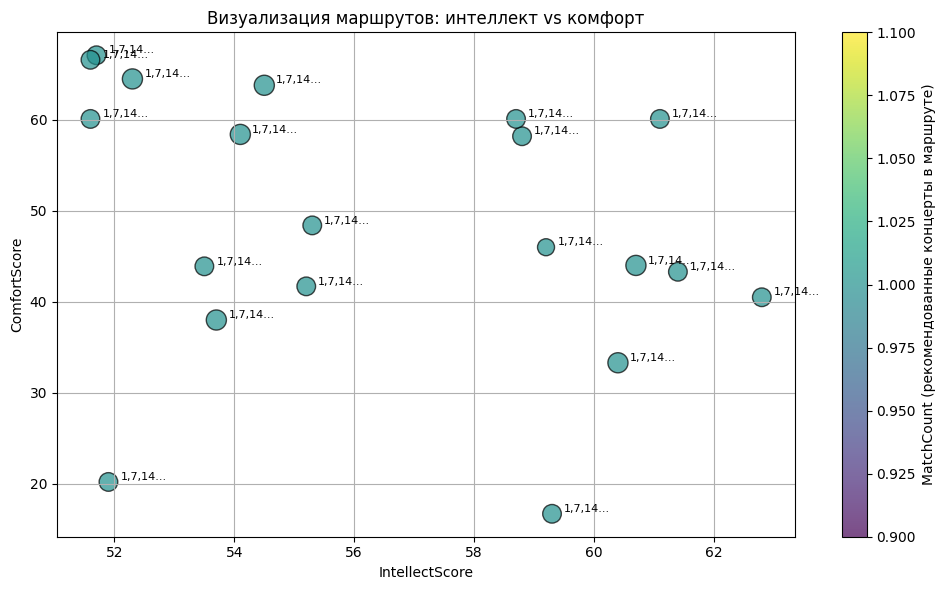

In [85]:
import matplotlib.pyplot as plt

# === Параметры ===
top_n = 20  # сколько маршрутов отобразить

# Выбираем топ-N маршрутов после фильтрации и сортировки
viz_df = matched_routes.head(top_n).copy()

# Строим scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    viz_df["IntellectScore"],
    viz_df["ComfortScore"],
    c=viz_df["MatchCount"],
    s=viz_df["Concerts"] * 30,  # масштабируем размер по числу концертов
    cmap="viridis",
    alpha=0.7,
    edgecolors="k"
)

# Подписи точек — первые 3 концерта маршрута
for idx, row in viz_df.iterrows():
    label = ','.join(map(str, row["Sostav"][:3])) + ('...' if len(row["Sostav"]) > 3 else '')
    plt.text(
        row["IntellectScore"] + 0.2, 
        row["ComfortScore"] + 0.2, 
        label, 
        fontsize=8
    )

plt.colorbar(scatter, label="MatchCount (рекомендованные концерты в маршруте)")
plt.xlabel("IntellectScore")
plt.ylabel("ComfortScore")
plt.title("Визуализация маршрутов: интеллект vs комфорт")
plt.grid(True)
plt.tight_layout()
plt.show()


Попытаемся не только визуализировать предложенные маршруты, но и дадим какие то нравственные ориентирвы в этой схеие.
Добавим диагональ (или смещённую диагональ), отражающую баланс между IntellectScore и ComfortScore.

Грандиозная идея:
* Всё, что выше линии — более интеллектуально и комфортно.

* Всё, что ниже линии — уступает по суммарной "ценности".

/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/2298395606.py:45: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


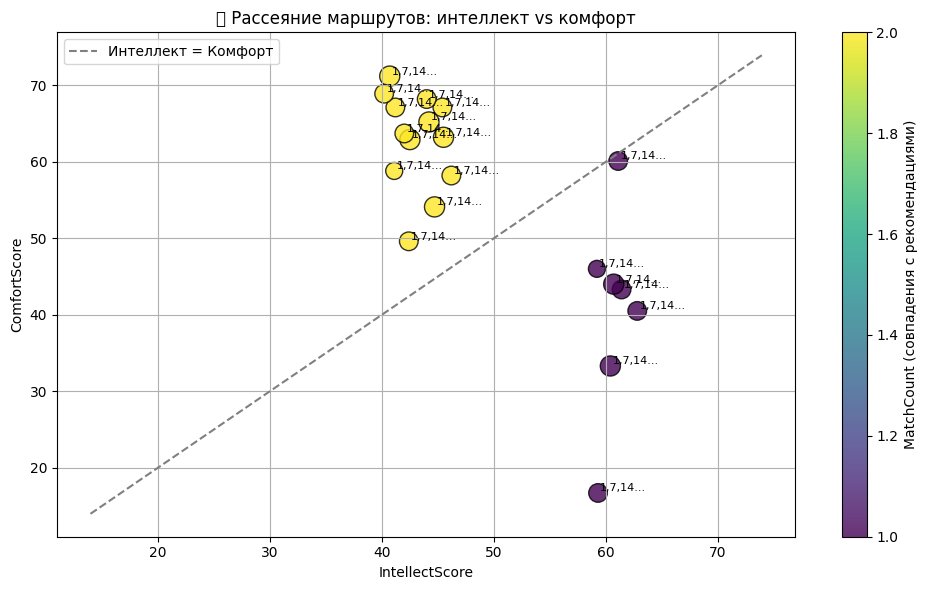

In [103]:
import matplotlib.pyplot as plt

# Топ-N маршрутов по MatchCount + интеллект + комфорт (без агрегирования)
top_n = 20
viz_df = matched_routes.sort_values(
    by=["MatchCount", "IntellectScore", "ComfortScore"], 
    ascending=[False, False, False]
).head(top_n).copy()

# Построение scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    viz_df["IntellectScore"],
    viz_df["ComfortScore"],
    c=viz_df["MatchCount"],
    s=viz_df["Concerts"] * 30,
    cmap="viridis",
    alpha=0.8,
    edgecolors="k"
)

# Подписи: первые 3 концерта
for idx, row in viz_df.iterrows():
    label = ','.join(map(str, row["Sostav"][:3])) + ('...' if len(row["Sostav"]) > 3 else '')
    plt.text(
        row["IntellectScore"] + 0.2,
        row["ComfortScore"] + 0.2,
        label,
        fontsize=8
    )

# Диагональная линия-ориентир
x_vals = plt.xlim()
y_vals = plt.ylim()
min_val = min(x_vals[0], y_vals[0])
max_val = max(x_vals[1], y_vals[1])
plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Интеллект = Комфорт")

plt.colorbar(scatter, label="MatchCount (совпадения с рекомендациями)")
plt.xlabel("IntellectScore")
plt.ylabel("ComfortScore")
plt.title("🎵 Рассеяние маршрутов: интеллект vs комфорт")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/1345048047.py:51: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


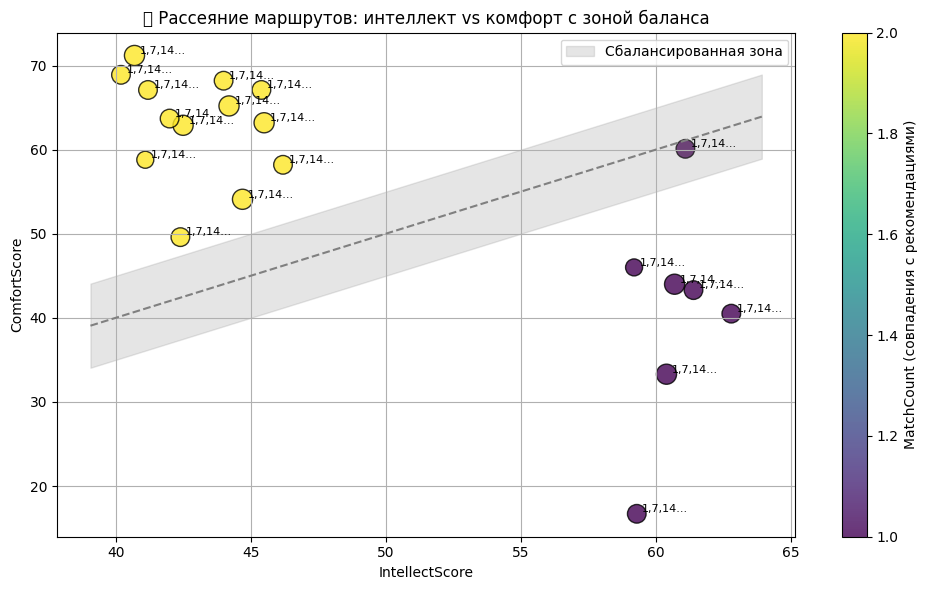

In [108]:
import matplotlib.pyplot as plt

 # Топ-N маршрутов по MatchCount + интеллект + комфорт (без агрегирования)
top_n = 20
viz_df = matched_routes.sort_values(
    by=["MatchCount", "IntellectScore", "ComfortScore"], 
    ascending=[False, False, False]
).head(top_n).copy()

# Построение scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    viz_df["IntellectScore"],
    viz_df["ComfortScore"],
    c=viz_df["MatchCount"],
    s=viz_df["Concerts"] * 30,
    cmap="viridis",
    alpha=0.8,
    edgecolors="k"
)

# Подписи: первые 3 концерта в маршруте
for idx, row in viz_df.iterrows():
    label = ','.join(map(str, row["Sostav"][:3])) + ('...' if len(row["Sostav"]) > 3 else '')
    plt.text(
        row["IntellectScore"] + 0.2,
        row["ComfortScore"] + 0.2,
        label,
        fontsize=8
    )

# Диагональная линия: Интеллект = Комфорт
x_min, x_max = plt.xlim()
zone_x = [x_min, x_max]

# Зона сбалансированных маршрутов: ±5 от диагонали
zone_y_lower = [x - 5 for x in zone_x]
zone_y_upper = [x + 5 for x in zone_x]
plt.fill_between(zone_x, zone_y_lower, zone_y_upper, color='gray', alpha=0.2, label="Сбалансированная зона")

# Линия-ориентир
plt.plot(zone_x, zone_x, '--', color='gray')

# Оформление
plt.colorbar(scatter, label="MatchCount (совпадения с рекомендациями)")
plt.xlabel("IntellectScore")
plt.ylabel("ComfortScore")
plt.title("🎵 Рассеяние маршрутов: интеллект vs комфорт с зоной баланса")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/1044935022.py:43: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


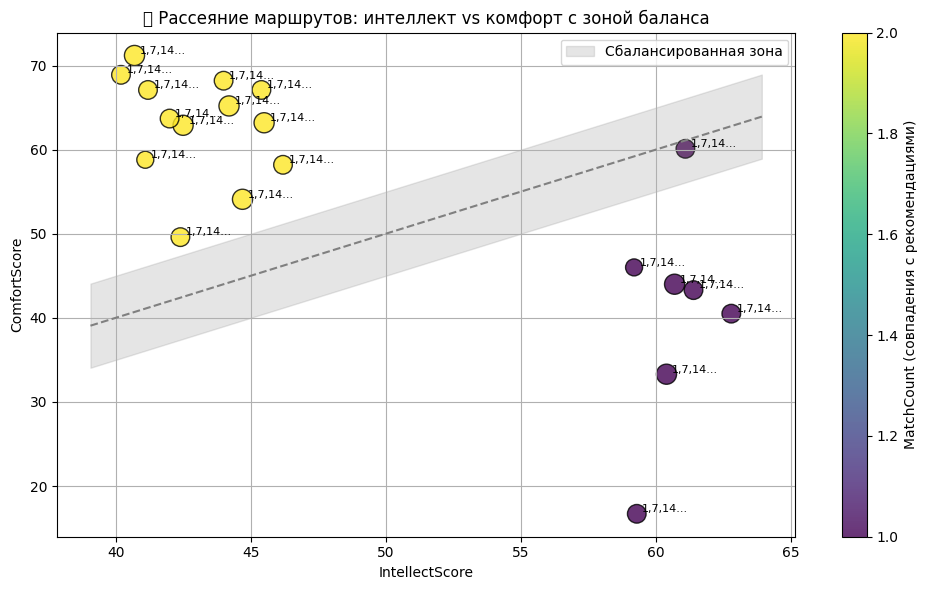

In [106]:
# Сначала отрисовка scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    viz_df["IntellectScore"],
    viz_df["ComfortScore"],
    c=viz_df["MatchCount"],
    s=viz_df["Concerts"] * 30,
    cmap="viridis",
    alpha=0.8,
    edgecolors="k"
)

# Подписи точек
for idx, row in viz_df.iterrows():
    label = ','.join(map(str, row["Sostav"][:3])) + ('...' if len(row["Sostav"]) > 3 else '')
    plt.text(
        row["IntellectScore"] + 0.2,
        row["ComfortScore"] + 0.2,
        label,
        fontsize=8
    )

# После scatter() — зафиксировать границы
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
zone_x = [x_min, x_max]

# Зона ±5
zone_y_lower = [x - 5 for x in zone_x]
zone_y_upper = [x + 5 for x in zone_x]
plt.fill_between(zone_x, zone_y_lower, zone_y_upper, color='gray', alpha=0.2, label="Сбалансированная зона")

# Диагональная линия
plt.plot(zone_x, zone_x, '--', color='gray')

# Остальное оформление
plt.colorbar(scatter, label="MatchCount (совпадения с рекомендациями)")
plt.xlabel("IntellectScore")
plt.ylabel("ComfortScore")
plt.title("🎵 Рассеяние маршрутов: интеллект vs комфорт с зоной баланса")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/4100926047.py:44: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


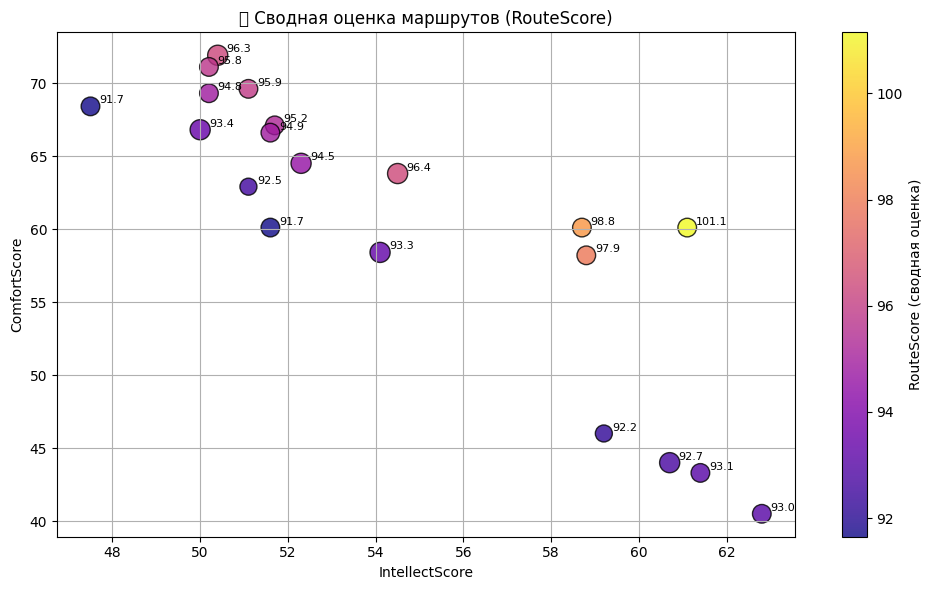

In [91]:
# это была шальная модель, где я попробоваал ввести еще один интегральный показатель на основе других показателей, получить какие то очки и назвать это лучшим
# === Весовые коэффициенты ===
w1, w2, w3 = 10, 1.0, 0.5

# === Добавим RouteScore
matched_routes["RouteScore"] = (
    w1 * matched_routes["MatchCount"] +
    w2 * matched_routes["IntellectScore"] +
    w3 * matched_routes["ComfortScore"]
)

# === Визуализация лучших маршрутов по RouteScore
top_n = 20
viz_df = matched_routes.sort_values(by="RouteScore", ascending=False).head(top_n).copy()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    viz_df["IntellectScore"],
    viz_df["ComfortScore"],
    c=viz_df["RouteScore"],
    s=viz_df["Concerts"] * 30,
    cmap="plasma",
    alpha=0.8,
    edgecolors="k"
)

# Подписи: RouteScore и короткий состав
for idx, row in viz_df.iterrows():
    label = f"{row['RouteScore']:.1f}"
    plt.text(
        row["IntellectScore"] + 0.2,
        row["ComfortScore"] + 0.2,
        label,
        fontsize=8
    )

plt.colorbar(scatter, label="RouteScore (сводная оценка)")
plt.xlabel("IntellectScore")
plt.ylabel("ComfortScore")
plt.title("🎵 Сводная оценка маршрутов (RouteScore)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Альтернативные маршруты

В предыдущем случае мы смотрели на рекомендации исходя из того, что пользователь уже жестко имеет сколько то концертов и хочет докупить еще сколько то, чтобы его маршрут был лучше.

Сейчас мы попытаемся решить задачу с другой стороны: пользователь выбрал какой то маршрут, который ему чем-то нравится. И мы хотим ему предложить не жесткое сравнение, где будут еще какие то маршруты может чуть с иными параметрами, но в целом близкие по характеристикам.

**Цель:**
Пользователь уже выбрал целый маршрут, но хочет посмотреть похожие маршруты — например:

* чуть короче,

* с другими исполнителями,

* более сбалансированный по залам,

* или с чуть меньшими затратами.

**Механика:**

* Не требуем полного включения концертов

* Ищем маршруты с перекрытием концертов

* Сравниваем по схожести состава, но допускаем разницу

* Добавляем метрики расстояния/разности (например, по числу концертов, баллам, времени переходов и т.п.)

**Аналогия:**

«Вот мой маршрут. Есть что-то похожее, но может получше?»

In [129]:
# === Исходный маршрут пользователя ===
reference_route = [1, 14, 30]

In [130]:
import pandas as pd
import ast
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# === Загрузка маршрутов ===
routes_path = "RouteRange_with_GMM.csv"
df_routes = pd.read_csv(routes_path)
df_routes["Sostav"] = df_routes["Sostav"].apply(ast.literal_eval)


# === Бинаризация маршрутов для Jaccard-похожести ===
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df_routes["Sostav"])
reference_binary = mlb.transform([reference_route])[0]

# === Расчёт Jaccard-похожести
similarities = []
for row in binary_matrix:
    score = jaccard_score(reference_binary, row)
    similarities.append(score)

df_routes["JaccardSimilarity"] = similarities

# === Исключаем полностью идентичные маршруты и оставляем только частично совпадающие
similar_alternatives = df_routes[
    (df_routes["JaccardSimilarity"] < 1.0) & 
    (df_routes["JaccardSimilarity"] > 0)
].copy()

# === Дополнительные метрики: разница в длине маршрута
similar_alternatives["ConcertsDiff"] = (
    similar_alternatives["Concerts"] - len(reference_route)
).abs()

# === Сортировка по сходству, близости длины, интеллекту и комфорту
similar_alternatives = similar_alternatives.sort_values(
    by=["JaccardSimilarity", "ConcertsDiff", "IntellectScore", "ComfortScore"],
    ascending=[False, True, False, False]
)

# === Вывод топ-N маршрутов
top_n = 10
print(similar_alternatives[["Sostav", "Concerts", "JaccardSimilarity", "IntellectScore", "ComfortScore"]].head(top_n))


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/2320736864.py:8: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_routes = pd.read_csv(routes_path)


               Sostav  Concerts  JaccardSimilarity  IntellectScore  \
3352  [1, 14, 20, 30]         4               0.75            59.8   
3335  [1, 14, 18, 30]         4               0.75            51.1   
3377  [1, 14, 27, 30]         4               0.75            50.1   
3375  [1, 14, 26, 30]         4               0.75            49.9   
3360  [1, 14, 21, 30]         4               0.75            47.7   
3378  [1, 14, 28, 30]         4               0.75            46.1   
3371  [1, 14, 24, 30]         4               0.75            46.0   
2674   [1, 7, 14, 30]         4               0.75            45.7   
2787   [1, 8, 14, 30]         4               0.75            45.7   
3373  [1, 14, 25, 30]         4               0.75            45.7   

      ComfortScore  
3352          25.3  
3335          48.0  
3377          25.3  
3375          41.8  
3360          47.4  
3378          48.3  
3371          37.6  
2674          47.4  
2787          47.4  
3373          47.4 

### Надо объясниться

Вот все вроде здорово. Вбрали один маршрут. Показали ему альтернативу. Но пользователь же должен понять и содержательную часть изменений в последовательности номеров концертов.

Вот функция describe_alternative(), которая:

* сравнивает два маршрута по составу концертов,

* считает разницу в числовых характеристиках,

* возвращает структурированное описание изменений.

In [137]:
print(df_result.loc[0]['Пояснение'])

– 🎉 Добавлены: Шуман; Барток;  Струнный квартет № 3 ля мажор, ор. 41/3;  Румынские народные танцы
– 👨‍🎤 Новые исполнители: Квартет имени Давида Ойстраха
– 🔺 🎟️ Кол-во концертов: +1
– 🔺 🧠 Интеллект: +14.2 баллов
– 🔺 🛋️ Комфорт: +3.0 баллов
– 🔺 🚶 Переходы: +6.0
– 🔻 ⏱️ Ожидание: -45.0
– 🔺 💰 Затраты: +200


In [ ]:
import pandas as pd
import ast
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# === Вход: маршрут пользователя ===

ref_row = df_routes[df_routes["Sostav"].apply(lambda s: set(s) == set(reference_route))].iloc[0]

# === Поиск альтернатив по Jaccard-сходству ===
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df_routes["Sostav"])
ref_binary = mlb.transform([reference_route])[0]

similarities = [jaccard_score(ref_binary, row) for row in binary_matrix]
df_routes["JaccardSimilarity"] = similarities

similar_alts = df_routes[(df_routes["JaccardSimilarity"] < 1.0) & (df_routes["JaccardSimilarity"] > 0)].copy()
similar_alts["ConcertsDiff"] = (similar_alts["Concerts"] - len(reference_route)).abs()
similar_alts = similar_alts.sort_values(
    by=["JaccardSimilarity", "ConcertsDiff", "IntellectScore", "ComfortScore"],
    ascending=[False, True, False, False]
)

# === Функция описания отличий ===
def describe_alternative(ref_row, alt_row, name_map):
    ref_sostav = set(ref_row["Sostav"])
    alt_sostav = set(alt_row["Sostav"])
    removed = sorted(ref_sostav - alt_sostav)
    added = sorted(alt_sostav - ref_sostav)

    def fmt_names(ids):
        return ", ".join(name_map.get(i, f"#{i}") for i in ids)

    summary = []
    if removed:
        summary.append(f"– ❌ Убраны: {fmt_names(removed)}")
    if added:
        summary.append(f"– ✅ Добавлены: {fmt_names(added)}")

    # Основные числовые метрики
    score_keys = {
        "Concerts": "Маршрут",
        "IntellectScore": "Интеллект",
        "ComfortScore": "Комфорт",
        "TransTime": "Переходы",
        "WaitTime": "Ожидание",
        "Costs": "Затраты"
    }

    def delta(a, b): return round(b - a, 1)

    for key, label in score_keys.items():
        old = ref_row.get(key, 0)
        new = alt_row.get(key, 0)
        diff = delta(old, new)
        if diff != 0:
            arrow = "🔺" if diff > 0 else "🔻"
            unit = " баллов" if "Score" in key else ""
            summary.append(f"– {arrow} {label}: {diff:+}{unit}")

    return "\n".join(summary)


# === Применим ко всем альтернативам
top_n = 10
output = []
for _, alt_row in similar_alts.head(top_n).iterrows():
    description = describe_alternative(ref_row, alt_row, concert_names)
    output.append({
        "Альтернативный маршрут": alt_row["Sostav"],
        "JaccardSimilarity": round(alt_row["JaccardSimilarity"], 2),
        "Пояснение": description
    })

# === Вывод альтернатив и пояснений
df_result = pd.DataFrame(output)
pd.set_option("display.max_colwidth", None)
print(df_result.to_string(index=False))

Альтернативный маршрут  JaccardSimilarity                                                                                                                                                     Пояснение
       [1, 14, 20, 30]               0.75 – ✅ Добавлены: Концерт 20\n– 🔺 Маршрут: +1\n– 🔺 Интеллект: +14.2 баллов\n– 🔺 Комфорт: +3.0 баллов\n– 🔺 Переходы: +6.0\n– 🔻 Ожидание: -45.0\n– 🔺 Затраты: +200
       [1, 14, 18, 30]               0.75                     – ✅ Добавлены: Концерт 18\n– 🔺 Маршрут: +1\n– 🔺 Интеллект: +5.5 баллов\n– 🔺 Комфорт: +25.7 баллов\n– 🔻 Ожидание: -50.0\n– 🔺 Затраты: +200
       [1, 14, 27, 30]               0.75  – ✅ Добавлены: Концерт 27\n– 🔺 Маршрут: +1\n– 🔺 Интеллект: +4.5 баллов\n– 🔺 Комфорт: +3.0 баллов\n– 🔺 Переходы: +6.0\n– 🔻 Ожидание: -45.0\n– 🔺 Затраты: +200
       [1, 14, 26, 30]               0.75 – ✅ Добавлены: Концерт 26\n– 🔺 Маршрут: +1\n– 🔺 Интеллект: +4.3 баллов\n– 🔺 Комфорт: +19.5 баллов\n– 🔺 Переходы: +1.0\n– 🔻 Ожидание: -45.0\n– 🔺 Затраты: +200


Сделаем теперь то же самое но постараемся более подробно развернуть изменение в авторах и программах

In [136]:
import pandas as pd
import ast
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from collections import defaultdict

# === Загрузка всех данных ===
df_routes = pd.read_csv("RouteRange_with_GMM.csv")
df_routes["Sostav"] = df_routes["Sostav"].apply(ast.literal_eval)

df_shows = pd.read_excel("data_clean/show_details.xlsx")
df_artists = pd.read_excel("data_clean/artist_details.xlsx")
df_shows.columns = df_shows.columns.str.strip()
df_artists.columns = df_artists.columns.str.strip()

# === Справочники названий концертов и артистов ===
concert_name_map = defaultdict(str)
for show_id, group in df_shows.groupby("ShowNum"):
    authors = group["Author"].dropna().unique()
    programs = group["Programm"].dropna().unique()
    parts = list(authors) + list(programs)
    concert_name_map[show_id] = "; ".join(parts)

artist_map = defaultdict(list)
for show_id, group in df_artists.groupby("ShowNum"):
    artists = group["Artists"].dropna().tolist()
    artist_map[show_id] = artists

# === Функция описания различий ===
def describe_alternative(ref_row, alt_row, concert_name_map, artist_map):
    ref_set = set(ref_row["Sostav"])
    alt_set = set(alt_row["Sostav"])
    removed_ids = sorted(ref_set - alt_set)
    added_ids = sorted(alt_set - ref_set)

    def fmt_names(ids):
        return "; ".join(concert_name_map.get(i, f"Концерт #{i}") for i in ids)

    summary = []
    if removed_ids:
        summary.append(f"– 🎭 Убраны: {fmt_names(removed_ids)}")
    if added_ids:
        summary.append(f"– 🎉 Добавлены: {fmt_names(added_ids)}")

    def get_artists(ids):
        result = set()
        for i in ids:
            result.update(artist_map.get(i, []))
        return result

    removed_artists = get_artists(removed_ids)
    added_artists = get_artists(added_ids)
    common_artists = get_artists(ref_set & alt_set)

    new_artists = added_artists - common_artists
    gone_artists = removed_artists - common_artists

    if gone_artists:
        summary.append(f"– 🎤 Без: {', '.join(sorted(gone_artists))}")
    if new_artists:
        summary.append(f"– 👨‍🎤 Новые исполнители: {', '.join(sorted(new_artists))}")

    score_keys = {
        "Concerts": "🎟️ Кол-во концертов",
        "IntellectScore": "🧠 Интеллект",
        "ComfortScore": "🛋️ Комфорт",
        "TransTime": "🚶 Переходы",
        "WaitTime": "⏱️ Ожидание",
        "Costs": "💰 Затраты"
    }

    def delta(a, b): return round(b - a, 1)

    for key, label in score_keys.items():
        old = ref_row.get(key, 0)
        new = alt_row.get(key, 0)
        diff = delta(old, new)
        if diff != 0:
            arrow = "🔺" if diff > 0 else "🔻"
            unit = " баллов" if "Score" in key else ""
            summary.append(f"– {arrow} {label}: {diff:+}{unit}")

    return "\n".join(summary)

# === Исходный маршрут пользователя ===
reference_route = [1, 14, 30]
ref_row = df_routes[df_routes["Sostav"].apply(lambda s: set(s) == set(reference_route))].iloc[0]

# === Поиск альтернатив ===
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df_routes["Sostav"])
ref_binary = mlb.transform([reference_route])[0]
df_routes["JaccardSimilarity"] = [jaccard_score(ref_binary, row) for row in binary_matrix]

similar_alts = df_routes[(df_routes["JaccardSimilarity"] < 1.0) & (df_routes["JaccardSimilarity"] > 0)].copy()
similar_alts["ConcertsDiff"] = (similar_alts["Concerts"] - len(reference_route)).abs()
similar_alts = similar_alts.sort_values(
    by=["JaccardSimilarity", "ConcertsDiff", "IntellectScore", "ComfortScore"],
    ascending=[False, True, False, False]
)

# === Сравнение альтернатив
top_n = 10
output = []
for _, alt_row in similar_alts.head(top_n).iterrows():
    description = describe_alternative(ref_row, alt_row, concert_name_map, artist_map)
    output.append({
        "Альтернативный маршрут": alt_row["Sostav"],
        "JaccardSimilarity": round(alt_row["JaccardSimilarity"], 2),
        "Пояснение": description
    })

# === Вывод альтернатив и пояснений
df_result = pd.DataFrame(output)
pd.set_option("display.max_colwidth", None)
print(df_result.to_string(index=False))

/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/2579405505.py:8: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_routes = pd.read_csv("RouteRange_with_GMM.csv")


Альтернативный маршрут  JaccardSimilarity                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Пояснение
       [1, 14, 20, 30]               0.75                                                                                                                                                                                                    – 🎉 Добавлены: Шуман; Барток;  Струнный квартет № 3 ля мажор, ор. 41/3;  Румынские народные танцы\n– 👨‍🎤 Новые исполнители: Квартет имени Давида Ойстраха\n– 🔺 🎟️ Кол-во концертов: +1\n– 🔺 🧠 Интеллект: +14.2 баллов\n–

In [138]:
print(df_result.loc[1]['Пояснение'])

– 🎉 Добавлены: Шопен;  Вариации на тему из оперы Моцарта «Дон Жуан» для фортепиано с оркестром;  Анданте спианато и большой блестящий полонез для фортепиано с оркестром, op. 22;  Краковяк, концертное рондо для фортепиано с оркестром фа мажор, op. 14
– 👨‍🎤 Новые исполнители: Дирижёр — Дмитрий Филатов, Рэм Урасин (фортепиано), Уральский молодёжный симфонический оркестр
– 🔺 🎟️ Кол-во концертов: +1
– 🔺 🧠 Интеллект: +5.5 баллов
– 🔺 🛋️ Комфорт: +25.7 баллов
– 🔻 ⏱️ Ожидание: -50.0
– 🔺 💰 Затраты: +200


In [143]:
import pandas as pd
import ast
from collections import defaultdict
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
import plotly.express as px

# === Загрузка данных ===
df_routes = pd.read_csv("RouteRange_with_GMM.csv")
df_routes["Sostav"] = df_routes["Sostav"].apply(ast.literal_eval)
df_shows = pd.read_excel("data_clean/show_details.xlsx")
df_artists = pd.read_excel("data_clean/artist_details.xlsx")
df_shows.columns = df_shows.columns.str.strip()
df_artists.columns = df_artists.columns.str.strip()

# === Справочники ===
concert_name_map = defaultdict(str)
for show_id, group in df_shows.groupby("ShowNum"):
    authors = group["Author"].dropna().unique()
    programs = group["Programm"].dropna().unique()
    parts = list(authors) + list(programs)
    concert_name_map[show_id] = "; ".join(parts)

artist_map = defaultdict(list)
for show_id, group in df_artists.groupby("ShowNum"):
    artists = group["Artists"].dropna().tolist()
    artist_map[show_id] = artists

# === Описание альтернатив ===
def describe_alternative(ref_row, alt_row, concert_name_map, artist_map):
    ref_set = set(ref_row["Sostav"])
    alt_set = set(alt_row["Sostav"])
    removed_ids = sorted(ref_set - alt_set)
    added_ids = sorted(alt_set - ref_set)

    def fmt_names(ids):
        return "; ".join(concert_name_map.get(i, f"Концерт #{i}") for i in ids)

    summary = []
    if removed_ids:
        summary.append(f"– 🎭 Убраны: {fmt_names(removed_ids)}")
    if added_ids:
        summary.append(f"– 🎉 Добавлены: {fmt_names(added_ids)}")

    def get_artists(ids):
        result = set()
        for i in ids:
            result.update(artist_map.get(i, []))
        return result

    removed_artists = get_artists(removed_ids)
    added_artists = get_artists(added_ids)
    common_artists = get_artists(ref_set & alt_set)

    new_artists = added_artists - common_artists
    gone_artists = removed_artists - common_artists

    if gone_artists:
        summary.append(f"– 🎤 Без: {', '.join(sorted(gone_artists))}")
    if new_artists:
        summary.append(f"– 👨‍🎤 Новые исполнители: {', '.join(sorted(new_artists))}")

    score_keys = {
        "Concerts": "🎟️ Концертов",
        "IntellectScore": "🧠 Интеллект",
        "ComfortScore": "🛋️ Комфорт",
        "TransTime": "🚶 Переходы",
        "WaitTime": "⏱️ Ожидание",
        "Costs": "💰 Затраты"
    }

    def delta(a, b): return round(b - a, 1)

    for key, label in score_keys.items():
        old = ref_row.get(key, 0)
        new = alt_row.get(key, 0)
        diff = delta(old, new)
        if diff != 0:
            arrow = "🔺" if diff > 0 else "🔻"
            unit = " баллов" if "Score" in key else ""
            summary.append(f"– {arrow} {label}: {diff:+}{unit}")

    return "\n".join(summary)

# === Поиск альтернатив ===
reference_route = [1, 14, 30]
ref_row = df_routes[df_routes["Sostav"].apply(lambda s: set(s) == set(reference_route))].iloc[0]

mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df_routes["Sostav"])
ref_binary = mlb.transform([reference_route])[0]
df_routes["JaccardSimilarity"] = [jaccard_score(ref_binary, row) for row in binary_matrix]

similar_alts = df_routes[(df_routes["JaccardSimilarity"] < 1.0) & (df_routes["JaccardSimilarity"] > 0)].copy()
similar_alts["ConcertsDiff"] = (similar_alts["Concerts"] - len(reference_route)).abs()
similar_alts = similar_alts.sort_values(
    by=["JaccardSimilarity", "ConcertsDiff", "IntellectScore", "ComfortScore"],
    ascending=[False, True, False, False]
)

# === Подготовка данных для визуализации ===
metrics = ["IntellectScore", "ComfortScore", "TransTime", "WaitTime", "Concerts"]
delta_data = []
hover_texts = []

for idx, (_, alt_row) in enumerate(similar_alts.head(10).iterrows()):
    label = f"Альт #{idx+1}"
    deltas = {m: round(alt_row[m] - ref_row[m], 1) for m in metrics}
    for m, delta in deltas.items():
        delta_data.append({
            "Альтернатива": label,
            "Метрика": m,
            "Изменение": delta
        })
    explanation = describe_alternative(ref_row, alt_row, concert_name_map, artist_map)
    hover_texts.append((label, explanation))

df_viz = pd.DataFrame(delta_data)
df_viz["Подсказка"] = df_viz["Альтернатива"].map(dict(hover_texts))

# === Визуализация Plotly ===
fig = px.bar(
    df_viz,
    x="Альтернатива",
    y="Изменение",
    color="Метрика",
    barmode="group",
    hover_name="Альтернатива",
    hover_data={"Метрика": True, "Изменение": True, "Подсказка": True}
)

fig.update_layout(
    title="📊 Отличия альтернативных маршрутов от исходного",
    yaxis_title="Изменение (альтернатива – исходный)",
    xaxis_title="Альтернативы",
    legend_title="Метрика",
    bargap=0.2,
    height=600
)

fig.update_yaxes(showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='gray')
fig.show()


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/185473258.py:9: DtypeWarning:

Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.



### Реализаци рекомендаций с нуля

В неком диапазоне концертов покажем три подборки по 5 позиций: лучшие среди интеллектуальных, среди комформтных и среди сбалансирвоанных.

In [148]:
import pandas as pd
import ast
from collections import defaultdict

# === Фильтрация разумных маршрутов (2–4 концерта) ===
filtered = df_routes[(df_routes["Concerts"] >= 4) & (df_routes["Concerts"] <= 8)].copy()
filtered["Sostav_str"] = filtered["Sostav"].apply(lambda s: ",".join(map(str, sorted(s))))

# === Группировка по уникальному составу маршрута ===
grouped = filtered.groupby("Sostav_str").agg({
    "Sostav": "first",
    "Concerts": "first",
    "IntellectScore": "mean",
    "ComfortScore": "mean",
    "TransTime": "mean",
    "WaitTime": "mean",
    "Costs": "mean"
}).reset_index(drop=True)

# === Логики выбора маршрутов ===
top_intellect = grouped.sort_values(by="IntellectScore", ascending=False).head(5).copy()
top_comfort = grouped.sort_values(by="ComfortScore", ascending=False).head(5).copy()
top_balanced = grouped.sort_values(by=["IntellectScore", "ComfortScore"], ascending=[False, False]).head(5).copy()

top_intellect["Логика"] = "🧠 Интеллектуальные маршруты"
top_comfort["Логика"] = "🛋️ Комфортные маршруты"
top_balanced["Логика"] = "⚖️ Сбалансированные маршруты"

# === Объединение всех результатов ===
recommendations_df = pd.concat([top_intellect, top_comfort, top_balanced], ignore_index=True)

# === Форматирование состава маршрута для отображения ===
def format_sostav(sostav):
    return "; ".join(concert_name_map.get(i, f"#{i}") for i in sostav)

recommendations_df["Состав маршрута"] = recommendations_df["Sostav"].apply(format_sostav)

# === Вывод таблицы ===
cols_to_show = [
    "Логика", "Состав маршрута", "Concerts", 
    "IntellectScore", "ComfortScore", "TransTime", 
    "WaitTime", "Costs"
]
print(recommendations_df[cols_to_show].drop(['Состав маршрута'], axis=1).to_string(index=False))


                      Логика  Concerts  IntellectScore  ComfortScore  TransTime  WaitTime  Costs
 🧠 Интеллектуальные маршруты         6            74.6          76.0       23.0     200.0 1200.0
 🧠 Интеллектуальные маршруты         5            74.4          51.6       23.0     245.0 1000.0
 🧠 Интеллектуальные маршруты         5            74.4          77.6       14.0     245.0 1000.0
 🧠 Интеллектуальные маршруты         5            74.1          54.4       22.0     245.0 1000.0
 🧠 Интеллектуальные маршруты         5            74.0          72.1       16.0     240.0 1000.0
      🛋️ Комфортные маршруты         4            64.1          98.7        1.0      90.0  800.0
      🛋️ Комфортные маршруты         5            67.5          98.6        3.0     120.0 1000.0
      🛋️ Комфортные маршруты         6            43.1          98.5        9.0     135.0 1200.0
      🛋️ Комфортные маршруты         6            60.0          98.5        9.0     135.0 1200.0
      🛋️ Комфортные маршруты  

### Советуем чуть умнее

Предыдущий вариант нам в любом случае пригодиться - клиент может проигнорировать наши умные вопросы. Но сейчас мы попробуем сформулировать какую-то мини анкету, на основании которой чуть лучше рекомендовать варианты на старте предложений.

In [ ]:
# === Анкета пользователя ===
user_profile = {
    "priority": "balance",  # intellect / comfort / balance
    "max_concerts": 4,
    "diversity": "mono",  # mono / diverse / flexible
    "include": {
        "composers": ["Шуман", "Шуберт"],
        "artists": [],
        "concert_ids": []
    },
    "exclude": {
        "composers": [],
        "artists": [],
        "concert_ids": []
    }
}

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# === Загрузка данных ===
df_routes = pd.read_csv("RouteRange_with_GMM.csv")
df_routes["Sostav"] = df_routes["Sostav"].apply(ast.literal_eval)

df_shows = pd.read_excel("data_clean/show_details.xlsx")
df_artists = pd.read_excel("data_clean/artist_details.xlsx")
df_shows.columns = df_shows.columns.str.strip()
df_artists.columns = df_artists.columns.str.strip()

# === Словари концертов ===
concert_name_map = defaultdict(str)
for show_id, group in df_shows.groupby("ShowNum"):
    authors = group["Author"].dropna().unique()
    programs = group["Programm"].dropna().unique()
    parts = list(authors) + list(programs)
    concert_name_map[show_id] = "; ".join(parts)

artist_map = df_artists.groupby("ShowNum")["Artists"].apply(list).to_dict()

concert_authors = {
    cid: df_shows[df_shows["ShowNum"] == cid]["Author"].dropna().tolist()
    for cid in df_routes["Sostav"].explode().unique()
}

# === Метрики разнообразия ===
def get_composer_metrics_fast(sostav):
    composers = []
    for cid in sostav:
        composers.extend(concert_authors.get(cid, []))
    if not composers:
        return 0, 0.0
    counts = pd.Series(composers).value_counts()
    return len(counts), round(counts.iloc[0] / len(composers), 2)

df_routes["ComposerCount"], df_routes["MainComposerShare"] = zip(*df_routes["Sostav"].map(get_composer_metrics_fast))



# === Фильтрация маршрутов ===
def passes_filters(sostav, include, exclude):
    composers = []
    artists = []
    for cid in sostav:
        composers.extend(df_shows[df_shows["ShowNum"] == cid]["Author"].dropna().tolist())
        artists.extend(artist_map.get(cid, []))

    composers = set(composers)
    artists = set(artists)
    ids = set(sostav)

    if include["composers"] and not composers.intersection(include["composers"]):
        return False
    if include["artists"] and not artists.intersection(include["artists"]):
        return False
    if include["concert_ids"] and not ids.intersection(include["concert_ids"]):
        return False

    if composers.intersection(exclude["composers"]):
        return False
    if artists.intersection(exclude["artists"]):
        return False
    if ids.intersection(exclude["concert_ids"]):
        return False

    return True

# === Применение фильтров ===
filtered = df_routes[df_routes["Concerts"] <= user_profile["max_concerts"]].copy()
if user_profile["diversity"] == "diverse":
    filtered = filtered[filtered["ComposerCount"] >= 3]
elif user_profile["diversity"] == "mono":
    filtered = filtered[filtered["MainComposerShare"] >= 0.8]

filtered = filtered[filtered["Sostav"].apply(lambda s: passes_filters(s, user_profile["include"], user_profile["exclude"]))]

# === Взвешенное ранжирование ===
weights = {
    "intellect": (1.0, 0.0),
    "comfort": (0.0, 1.0),
    "balance": (0.5, 0.5)
}
w_i, w_c = weights[user_profile["priority"]]
filtered["WeightedScore"] = w_i * filtered["IntellectScore"] + w_c * filtered["ComfortScore"]

# === Финальный вывод ===
top_routes = filtered.sort_values(by="WeightedScore", ascending=False).head(10).copy()
top_routes["Состав маршрута"] = top_routes["Sostav"].apply(
    lambda s: "; ".join(concert_name_map.get(i, f"#{i}") for i in s)
)

# Вывод на экран
print(top_routes[[
    "Состав маршрута", "Concerts", "IntellectScore", "ComfortScore",
    "ComposerCount", "MainComposerShare", "TransTime", "WaitTime", "Costs"
]])


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/2970883474.py:6: DtypeWarning:

Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.



                                                                                                                                                                                                                                             Состав маршрута  \
418  Шуман;  Арабески, ор. 18;  Симфонические этюды, op. 13; Шуман;  Три фантастические пьесы для виолончели и фортепиано;  Фортепианный квинтет ми-бемоль мажор, ор. 44; Шуман; Барток;  Струнный квартет № 3 ля мажор, ор. 41/3;  Румынские народные танцы   
411                        Шуман;  Арабески, ор. 18;  Симфонические этюды, op. 13; Шуман;  Три фантастические пьесы для виолончели и фортепиано;  Фортепианный квинтет ми-бемоль мажор, ор. 44; _Прочее;  Авторские композиции и традиционные стили фламенко   
31                                                                                       Шуман;  Арабески, ор. 18;  Симфонические этюды, op. 13; Шуман;  Три фантастические пьесы для виолончели и фортепиано;  Фортепианный квинтет ми-

In [152]:
import plotly.express as px

viz_df = top_routes.copy()
viz_df["Маршрут"] = [f"Маршрут #{i+1}" for i in range(len(viz_df))]
viz_df["Описание"] = viz_df["Sostav"].apply(
    lambda s: "<br>".join(concert_name_map.get(cid, f"#{cid}") for cid in s)
)

fig = px.scatter(
    viz_df,
    x="IntellectScore",
    y="ComfortScore",
    size="Concerts",
    color="WeightedScore",
    hover_name="Маршрут",
    hover_data={
        "IntellectScore": True,
        "ComfortScore": True,
        "Concerts": True,
        "WeightedScore": True,
        "Описание": True
    },
    labels={
        "IntellectScore": "🧠 Intellect Score",
        "ComfortScore": "🛋️ Comfort Score",
        "WeightedScore": "🎯 Weighted Score"
    },
    title="🎼 Интерактивная визуализация рекомендованных маршрутов"
)

fig.add_shape(
    type="line",
    x0=viz_df["IntellectScore"].min(),
    y0=viz_df["IntellectScore"].min(),
    x1=viz_df["IntellectScore"].max(),
    y1=viz_df["IntellectScore"].max(),
    line=dict(color="gray", dash="dash"),
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text="Score", legend=dict(itemsizing='constant'))
fig.show()


## 🎯 Интерпретация графика маршрутов фестиваля

Каждая точка на графике — это **маршрут** (набор концертов), рекомендованный вам по результатам анкеты.

---

### 🔍 Что означают визуальные элементы:

| Элемент                     | Значение                                                                 |
|----------------------------|--------------------------------------------------------------------------|
| **🧠 Ось X — Intellect Score** | Насколько интеллектуально насыщен маршрут (сложность, глубина программы) |
| **🛋️ Ось Y — Comfort Score**   | Насколько маршрут комфортен (удобная логистика, паузы, распределение по времени) |
| **🎨 Цвет точки**             | Общий рейтинг маршрута (взвешенный с учётом ваших приоритетов).  
Чем **ярче** — тем **лучше** |
| **⚪ Размер круга**           | Количество концертов в маршруте. Большой круг — длинный маршрут |
| **➖ Пунктирная линия**       | Линия баланса: интеллект = комфорт |

---

### 🧭 Как читать график:

#### ✅ Зона **вдоль пунктирной линии**
- Хорошо сбалансированные маршруты: **интересны и не утомляют**
- Лучший выбор, если не хотите делать жёсткий перекос

#### 🧠 Область **справа от линии**
- **Интеллектуально насыщенные** маршруты
- Подойдут тем, кто хочет глубокого художественного опыта

#### 🛋️ Область **слева от линии**
- **Максимально комфортные** маршруты
- Подойдут тем, кто ценит лёгкость восприятия и удобство

#### 🌟 Цвет и размер:
- **Яркий большой круг в правом верхнем углу** — потенциальный **звёздный маршрут**
- **Мелкие и тусклые точки** — менее приоритетны

---

### 🧑‍💼 Пример интерпретации:

> 🔍 _«Эта точка — крупный круг, ярко окрашен, и почти на диагонали.  
> Значит, это 4-концертный маршрут, хорошо сбалансирован, с высоким общим рейтингом — стоит рассмотреть!»_


### автоматическая интерпретация

На уровне слов и акцентов тут еще надо работать, но можно попробовать еще сделать автоматическую интерпретацию, чтобы клиент ыидел маршрут не только в цифрах но и наборе волшебных слов.

In [153]:
import pandas as pd

# Предположим, что у вас уже есть DataFrame `viz_df` с колонками:
# 'Sostav', 'Concerts', 'IntellectScore', 'ComfortScore', 'WeightedScore'

# Интерпретация зон на основе разницы
def interpret_point(row):
    x, y = row["IntellectScore"], row["ComfortScore"]
    delta = round(x - y, 1)
    
    if abs(delta) <= 1:
        zone = "✅ Сбалансированный маршрут"
    elif delta > 1:
        zone = "🧠 Интеллектуально насыщенный маршрут"
    else:
        zone = "🛋️ Комфортный маршрут"

    return f"{zone} (разница: {delta:+})"

# Добавим названия маршрутов
viz_df = top_routes.copy()
viz_df["Маршрут"] = [f"Маршрут #{i+1}" for i in range(len(viz_df))]

# Интерпретация зоны
viz_df["Интерпретация зоны"] = viz_df.apply(interpret_point, axis=1)

# Добавим расшифровку состава
viz_df["Состав маршрута"] = viz_df["Sostav"].apply(
    lambda s: "; ".join(concert_name_map.get(cid, f"#{cid}") for cid in s)
)

# Отображаемые колонки
cols_to_show = [
    "Маршрут", "Состав маршрута", "Concerts", "IntellectScore", "ComfortScore",
    "WeightedScore", "Интерпретация зоны"
]

# Вывод в Jupyter Notebook
from IPython.display import display
display(viz_df[cols_to_show])


,Маршрут,Состав маршрута,Concerts,IntellectScore,ComfortScore,WeightedScore,Интерпретация зоны
418,Маршрут #1,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; Шуман; Барток; Струнный квартет № 3 ля мажор, ор. 41/3; Румынские народные танцы",3,60.1,76.2,68.15,🛋️ Комфортный маршрут (разница: -16.1)
411,Маршрут #2,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; _Прочее; Авторские композиции и традиционные стили фламенко",3,47.4,87.2,67.30,🛋️ Комфортный маршрут (разница: -39.8)
31,Маршрут #3,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44",2,43.4,86.9,65.15,🛋️ Комфортный маршрут (разница: -43.5)
423,Маршрут #4,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; _Прочее; Музыка средневековья и эпохи Возрождения",3,43.3,75.4,59.35,🛋️ Комфортный маршрут (разница: -32.1)
427,Маршрут #5,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; Мендельсон; «Сон в летнюю ночь» для чтецов, солистов, женского хора и оркестра",3,49.6,65.5,57.55,🛋️ Комфортный маршрут (разница: -15.9)
424,Маршрут #6,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; _Прочее; Авторские композиции и традиционные стили фламенко",3,47.4,60.1,53.75,🛋️ Комфортный маршрут (разница: -12.7)
426,Маршрут #7,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13; Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44; _Прочее; Музыкально-хореографический спектакль о Красоте в танцевальных движениях",3,43.4,56.9,50.15,🛋️ Комфортный маршрут (разница: -13.5)
7,Маршрут #8,"Шуман; Три фантастические пьесы для виолончели и фортепиано; Фортепианный квинтет ми-бемоль мажор, ор. 44",1,47.0,48.3,47.65,🛋️ Комфортный маршрут (разница: -1.3)
16,Маршрут #9,Шуберт; Фантазия фа минор; Вариации на оригинальную тему ля-бемоль мажор,1,47.0,48.3,47.65,🛋️ Комфортный маршрут (разница: -1.3)
0,Маршрут #10,"Шуман; Арабески, ор. 18; Симфонические этюды, op. 13",1,42.9,48.3,45.60,🛋️ Комфортный маршрут (разница: -5.4)


# ОЦенка реально купленных маршрутов

Задним числом коненчо насочинять можно много чего. Но будет честно, если мы просто посмотрим, какие маршруты по факту пользователи купили. Сравним их с нашей системой оценок. Поймем что-то про этих людей. И сравним их совокупные решения с нашим набором "лучших" (на наш вкус) рекомендаций. 

In [155]:
import pandas as pd
import ast

# Загрузка истории покупок за первый день
df_ops_day1 = pd.read_excel("GoodOperetions-OneDay.xlsx") #чтобы не путаться, тут транзакции только по концертам первого дня
df_ops_day1.columns = df_ops_day1.columns.str.strip()

# Группировка по пользователям
user_concerts_day1 = (
    df_ops_day1.groupby("ClientId")["ShowNum"]
    .apply(lambda x: list(set(x)))
    .reset_index(name="ShowList")
)
user_concerts_day1["ConcertCount"] = user_concerts_day1["ShowList"].apply(len)

# Отбор пользователей с маршрутами от 3 концертов
user_routes_day1 = user_concerts_day1[user_concerts_day1["ConcertCount"] >= 3].copy()

# Загрузка рассчитанных маршрутов
df_all_routes = pd.read_csv("RouteRange_with_GMM.csv", low_memory=False)
df_all_routes["Sostav"] = df_all_routes["Sostav"].apply(ast.literal_eval)

# Построение lookup-таблицы: множество концертов -> строка с метриками
route_lookup = {
    frozenset(row["Sostav"]): row
    for _, row in df_all_routes.iterrows()
}

# Сопоставление маршрутов и сбор метрик
rows = []
for _, row in user_routes_day1.iterrows():
    concerts = row["ShowList"]
    route_data = route_lookup.get(frozenset(concerts))
    if route_data is not None:
        rows.append({
            "ClientId": row["ClientId"],
            "Concerts": len(concerts),
            "IntellectScore": route_data["IntellectScore"],
            "ComfortScore": route_data["ComfortScore"],
            "TransTime": route_data["TransTime"],
            "WaitTime": route_data["WaitTime"],
            "Costs": route_data["Costs"]
        })

# Сбор результатов в таблицу
df_user_day1_real_routes = pd.DataFrame(rows)

df_user_day1_real_routes.to_csv("user_day1_routes.csv", index=False)



In [156]:
df_user_day1_real_routes

,ClientId,Concerts,IntellectScore,ComfortScore,TransTime,WaitTime,Costs
0,395,4,45.2,12.5,26.0,345.0,800
1,472,3,45.5,36.8,13.0,305.0,600
2,511,4,46.2,55.0,19.0,150.0,800
3,750,3,38.6,90.5,0.0,165.0,600
4,902,4,44.4,71.9,10.0,255.0,800
...,...,...,...,...,...,...,...
265,99371,3,43.9,89.4,1.0,150.0,600
266,99373,5,40.8,46.7,28.0,170.0,1000
267,99411,3,38.6,90.5,0.0,165.0,600
268,99629,3,43.7,43.5,14.0,165.0,600


Мы получили характеристики всех пользовательских маршрутов за первый день. ИНтересно будет их оценить визуально

In [161]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Указание источников данных
df_user_day1_real_routes["Source"] = "👥 Пользователь"
top_routes["Source"] = "🎯 Рекомендация"
top_routes["ClientId"] = "Top"

# Объединение
viz_df = pd.concat([
    df_user_day1_real_routes[[
        "IntellectScore", "ComfortScore", "Source", "ClientId",
        "Costs", "TransTime", "WaitTime", "Concerts"
    ]],
    top_routes[[
        "IntellectScore", "ComfortScore", "Source", "ClientId",
        "Costs", "TransTime", "WaitTime", "Concerts"
    ]]
])

# Границы
min_val = min(viz_df["IntellectScore"].min(), viz_df["ComfortScore"].min()) - 5
max_val = max(viz_df["IntellectScore"].max(), viz_df["ComfortScore"].max()) + 5

# Базовый график
fig = px.scatter(
    viz_df,
    x="IntellectScore",
    y="ComfortScore",
    color="Source",
    symbol="Source",
    hover_data={
        "ClientId": True,
        "Concerts": True,
        "Costs": True,
        "TransTime": True,
        "WaitTime": True,
        "IntellectScore": False,
        "ComfortScore": False
    },
    title="📊 Интерактивное сравнение маршрутов: пользователи vs рекомендации"
)

# Добавим зону баланса ±10
fig.add_shape(
    type="rect",
    x0=min_val,
    y0=min_val - 10,
    x1=max_val,
    y1=max_val + 10,
    line=dict(width=0),
    fillcolor="lightgray",
    opacity=0.3,
    layer="below"
)

# Диагональ — баланс
fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode="lines",
    line=dict(dash="dash", color="gray"),
    name="Баланс: интеллект = комфорт"
))

# Оформление
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(
    legend=dict(
        title="Тип маршрута",
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    ),
    hoverlabel=dict(bgcolor="white", font_size=12),
    autosize=False,
    width=1000,
    height=800
)

fig.show()


ЧТо можно сказать... наши лушие рекомендации делают прямо фронт на графике. А польщователльский выбор размазан почти равномерно по площади. Это не плохо. Но, учитывая, что в зону наших рекомендаций попала не так много реальных клиентов, можно предположить, что:
* Мощный маршрут придумать не так просто
* не все готовы даже не то что тратить время, но и просто задумываться над этим.
* нам есть кому советовать

In [163]:
import pandas as pd
import ast

# Загрузка маршрутов
df_all_routes = pd.read_csv("RouteRange_with_GMM.csv")
df_all_routes["Sostav"] = df_all_routes["Sostav"].apply(ast.literal_eval)
df_all_routes["SostavTuple"] = df_all_routes["Sostav"].apply(lambda x: tuple(sorted(x)))

# Загрузка операций
df_ops = pd.read_excel("GoodOperetions-OneDay.xlsx")

# Сборка маршрутов по пользователям
user_routes = (
    df_ops.groupby("ClientId")["ShowNum"]
    .apply(lambda x: tuple(sorted(set(x))))
    .reset_index()
    .rename(columns={"ShowNum": "SostavTuple"})
)

# Создаем таблицу с маршрутами пользователей
df_user_day1_real_routes = user_routes.copy()

# Метрики
metric_cols = ["IntellectScore", "ComfortScore", "WaitTime", "TransTime", "Costs"]

# Преобразуем lookup по строковому ключу
df_all_routes["SostavTuple_str"] = df_all_routes["SostavTuple"].map(str)
route_lookup = df_all_routes.set_index("SostavTuple_str")[metric_cols]

# Выбираем лучший рекомендованный маршрут
best_recommendation = df_all_routes.sort_values(
    by=["IntellectScore", "ComfortScore"],
    ascending=[False, False]
).iloc[0][metric_cols]

# Добавляем строковый ключ
df_user_day1_real_routes["SostavTuple_str"] = df_user_day1_real_routes["SostavTuple"].map(str)

# Сравнение метрик
output_rows = []
for idx, row in df_user_day1_real_routes.iterrows():
    user_key = row["SostavTuple_str"]
    if user_key not in route_lookup.index:
        continue
    real_metrics = route_lookup.loc[user_key]
    diff = best_recommendation - real_metrics
    output_rows.append(diff.to_dict())

# Подсчет среднего улучшения
df_diffs = pd.DataFrame(output_rows)
mean_diffs = df_diffs.mean().to_frame(name="Mean Improvement by Recommendation")
mean_diffs.reset_index(inplace=True)
mean_diffs.rename(columns={"index": "Metric"}, inplace=True)

# Вывод результата
print("\nСредние улучшения по сравнению с пользовательскими маршрутами:\n")
print(mean_diffs.to_string(index=False))


/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/3114469448.py:5: DtypeWarning:

Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.




Средние улучшения по сравнению с пользовательскими маршрутами:

        Metric  Mean Improvement by Recommendation
IntellectScore                           30.593797
  ComfortScore                           23.525426
      WaitTime                          147.774621
     TransTime                           20.521307
         Costs                          889.583333


Этот вывод показывает среднюю разницу между лучшим рекомендованным маршрутом (на основе всех возможных маршрутов первого дня) и реальными маршрутами пользователей, которые действительно купили ≥3 концерта на первый день фестиваля.

### 📊 Интерпретация метрик улучшения

Этот отчёт показывает **среднюю разницу между лучшим рекомендованным маршрутом** (из всех возможных маршрутов первого дня фестиваля) и **реальными маршрутами пользователей**, которые действительно купили ≥3 концерта на первый день.

| Метрика         | Среднее улучшение | Интерпретация |
|-----------------|-------------------|----------------|
| 🎓 **IntellectScore** | +30.6              | Рекомендованный маршрут содержит более интеллектуально насыщенную программу: интересные композиторы, редкие произведения, сложные жанры. |
| 🛋️ **ComfortScore**   | +23.5              | Логистика и удобство маршрута выше: лучше по времени, меньше накладок, удобнее для перемещений. |
| ⏱️ **WaitTime**       | +147.8             | Ожидание между концертами больше — это **минус**, если пользователь хочет компактный маршрут. |
| 🔁 **TransTime**      | +20.5              | Больше времени на перемещения — скорее всего, маршруты проходят через удалённые площадки. |
| 💰 **Costs**          | +889 ₽             | Более дорогой маршрут — либо за счёт количества концертов, либо за счёт уровня представлений (больше финальных концертов дня). |

---

### 💡 Выводы

- **Сильные стороны** наших рекомендаций:
  - Существенно выигрывают по содержательной (интеллектуальной) и логистической (комфорт) составляющим.
  
- **Слабые стороны**:
  - Требуют больше времени между концертами и перемещениями.
  - Обходятся дороже.


Помечу, чтобы не забыть идеи:
🔎 Возможные шаги:
- Сравнить с медианным маршрутом.
- Разбить пользователей на кластеры по типу маршрута.
- Визуализировать распределение отличий.

/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/3311425805.py:5: DtypeWarning:

Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



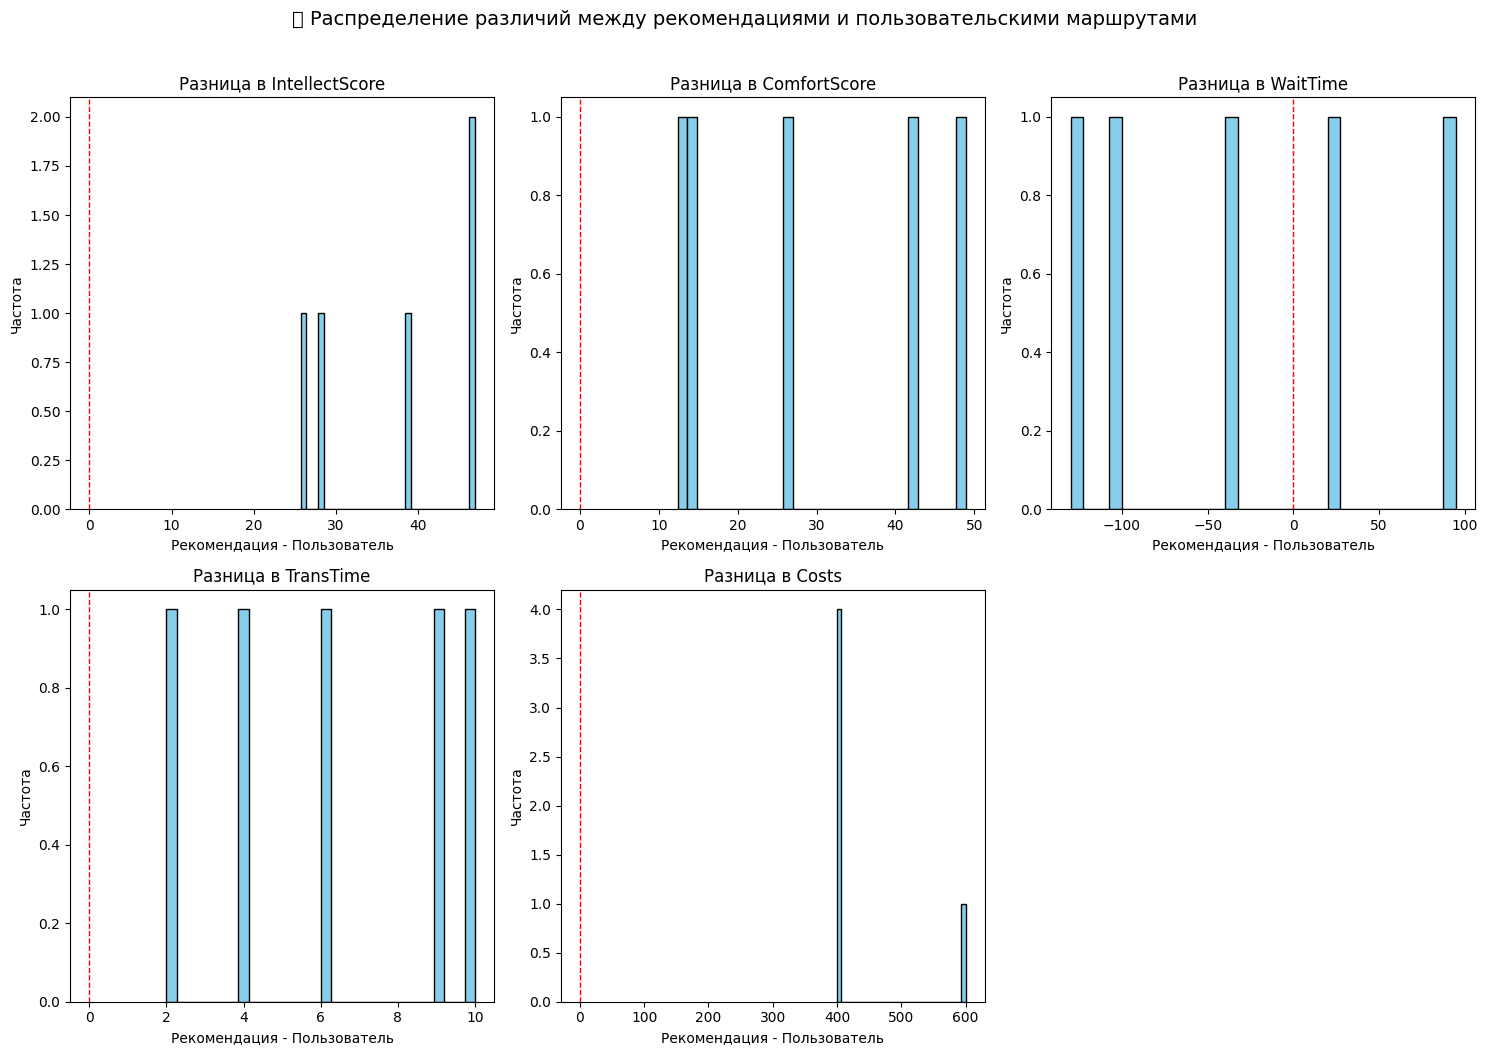

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Загрузка данных ---
routes_df = pd.read_csv("RouteRange_with_GMM.csv")
ops_df = pd.read_excel("GoodOperetions-OneDay.xlsx")

# --- Подготовка маршрутов ---
routes_df["RouteKey"] = routes_df["Sostav"].apply(
    lambda x: ",".join(sorted(map(str, eval(x))))
)

# --- Подготовка пользовательских маршрутов ---
user_day1 = ops_df.groupby("ClientId")["ShowId"].apply(
    lambda x: sorted(x.tolist())
).reset_index()
user_day1["RouteKey"] = user_day1["ShowId"].apply(lambda lst: ",".join(map(str, sorted(lst))))
user_day1["Len"] = user_day1["ShowId"].apply(len)
user_day1 = user_day1[user_day1["Len"] >= 3]

user_routes_df = pd.merge(
    user_day1, routes_df, on="RouteKey", how="inner"
)
user_routes_df["Type"] = "Пользователь"

# --- Подготовка топ-рекомендаций ---
top_routes_df = (
    routes_df.sort_values(by=["IntellectScore", "ComfortScore"], ascending=False)
    .head(len(user_routes_df))
    .copy()
)
top_routes_df["ClientId"] = user_routes_df["ClientId"].values
top_routes_df["Type"] = "Рекомендация"

# --- Объединение таблиц для анализа ---
cols_needed = ["ClientId", "IntellectScore", "ComfortScore", "WaitTime", "TransTime", "Costs", "Type"]
user_routes_df = user_routes_df[cols_needed]
top_routes_df = top_routes_df[cols_needed]
df_comparison = pd.concat([user_routes_df, top_routes_df], ignore_index=True)

# --- Формирование таблиц с метриками ---
recommended_metrics = df_comparison[
    df_comparison["Type"] == "Рекомендация"
].set_index("ClientId")[["IntellectScore", "ComfortScore", "WaitTime", "TransTime", "Costs"]]

user_metrics = df_comparison[
    df_comparison["Type"] == "Пользователь"
].set_index("ClientId")[["IntellectScore", "ComfortScore", "WaitTime", "TransTime", "Costs"]]

# --- Построение гистограмм различий ---
metric_cols = ['IntellectScore', 'ComfortScore', 'WaitTime', 'TransTime', 'Costs']
plt.figure(figsize=(15, 10))

for i, col in enumerate(metric_cols):
    plt.subplot(2, 3, i + 1)
    diff = recommended_metrics[col] - user_metrics[col]
    plt.hist(diff, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Разница в {col}")
    plt.xlabel("Рекомендация - Пользователь")
    plt.ylabel("Частота")

plt.tight_layout()
plt.suptitle("📊 Распределение различий между рекомендациями и пользовательскими маршрутами", fontsize=14, y=1.05)
plt.show()


На графиках показано распределение различий между рекомендованными и фактическими пользовательскими маршрутами по ключевым метрикам:

* Значения правее красной линии означают, что рекомендации лучше по данной метрике.

* Левее красной линии — пользовательский выбор оказался предпочтительнее.

* Чем больше площадь справа, тем выше доля случаев, когда рекомендации дают лучший результат.

Можно видеть, что по метрикам IntellectScore, ComfortScore и Costs рекомендации стабильно превосходят пользовательские маршруты. 

Вот таблица со сравнением средних значений метрик между пользовательскими маршрутами и нашими рекомендациями:

In [165]:
# user_metrics — метрики маршрутов пользователей
# recommended_metrics — метрики рекомендованных маршрутов

# Вычисление средних значений и разницы
summary_df = pd.DataFrame({
    "User (avg)": user_metrics.mean(),
    "Recommended (avg)": recommended_metrics.mean(),
    "Δ (rec - user)": recommended_metrics.mean() - user_metrics.mean(),
    "% Δ": 100 * (recommended_metrics.mean() - user_metrics.mean()) / user_metrics.mean()
}).round(2)

# Вывод таблицы
print(summary_df)


                User (avg)  Recommended (avg)  Δ (rec - user)     % Δ
IntellectScore       37.06              74.30           37.24  100.49
ComfortScore         37.52              66.34           28.82   76.81
WaitTime            266.00             235.00          -31.00  -11.65
TransTime            13.40              19.60            6.20   46.27
Costs               600.00            1040.00          440.00   73.33


Рекомендации заметно выигрывают по интеллектуальности и комфорту, немного уменьшают время ожидания, но требуют больше передвижений и затрат. (считаем, что стоимость концерта в 300р погоды в принятии решений не делает, потому стоимость растет просто от увеличения числа концертов и это не плохо)

/var/folders/ph/7m0lcx1d1_q_2b1f5fzxch7m0000gn/T/ipykernel_82224/654519573.py:30: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

/Users/georgijmamarin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



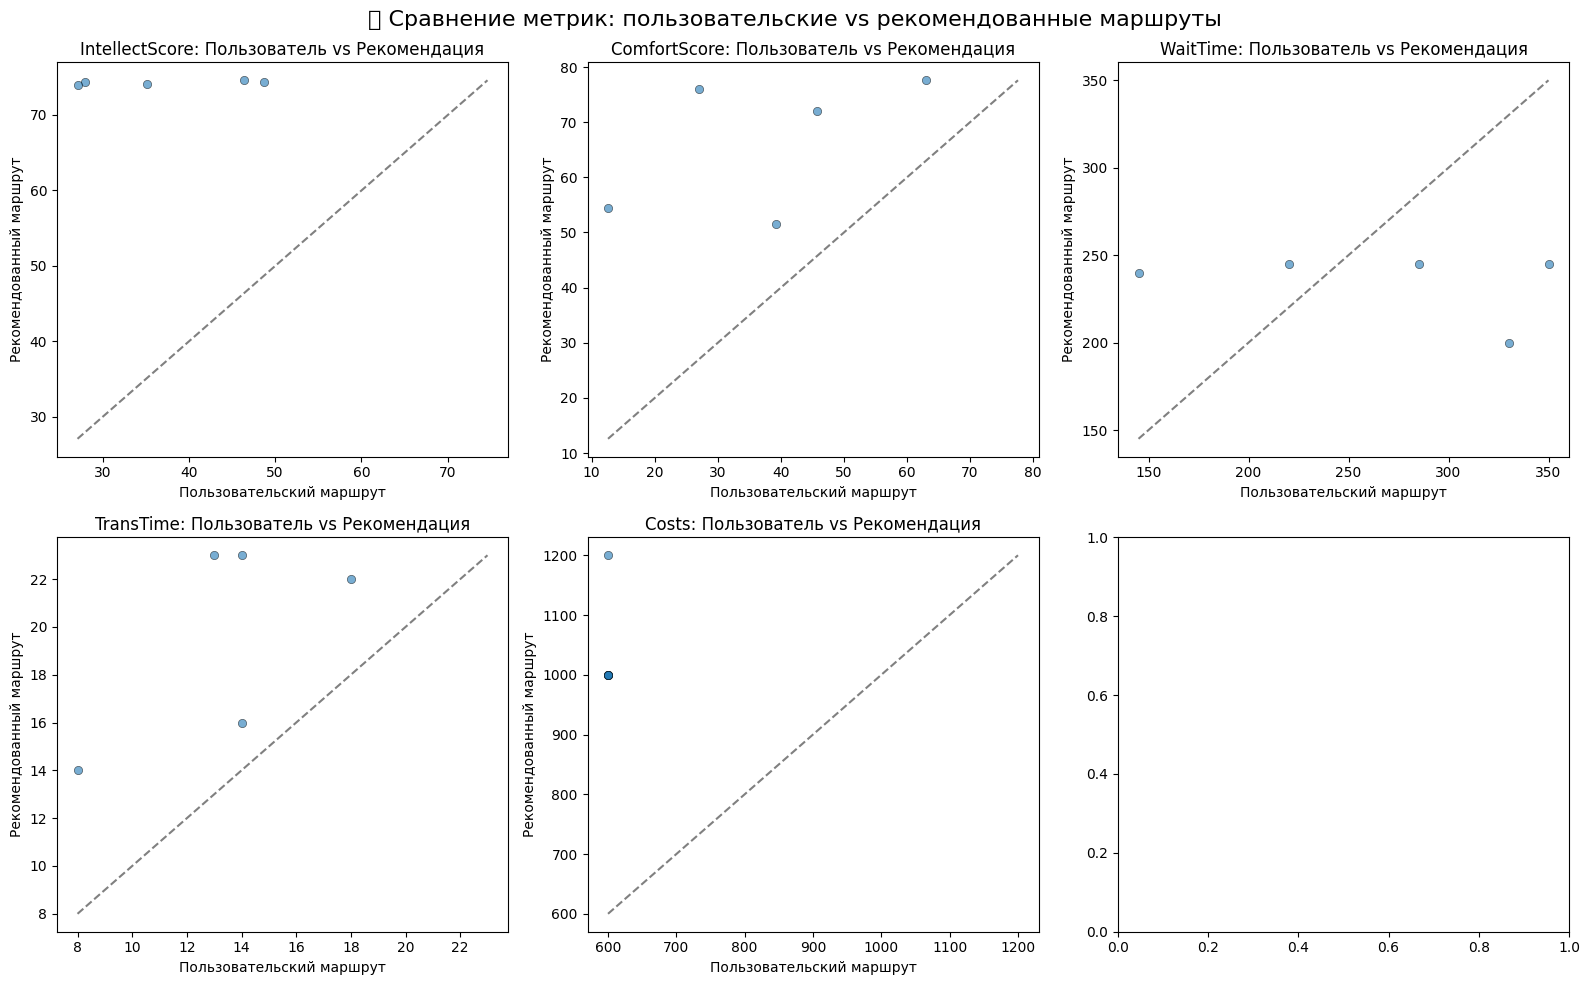

In [166]:
import seaborn as sns

# Список метрик, которые сравниваем
metric_cols = ['IntellectScore', 'ComfortScore', 'WaitTime', 'TransTime', 'Costs']

# Построение scatter-пар для каждой метрики
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(metric_cols):
    ax = axes[i]
    sns.scatterplot(
        x=user_metrics[col],
        y=recommended_metrics[col],
        ax=ax,
        alpha=0.6,
        edgecolor='k'
    )
    # Диагональная линия равенства
    min_val = min(user_metrics[col].min(), recommended_metrics[col].min())
    max_val = max(user_metrics[col].max(), recommended_metrics[col].max())
    ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray')

    ax.set_title(f"{col}: Пользователь vs Рекомендация")
    ax.set_xlabel("Пользовательский маршрут")
    ax.set_ylabel("Рекомендованный маршрут")

# Общий заголовок и компоновка
fig.suptitle("📈 Сравнение метрик: пользовательские vs рекомендованные маршруты", fontsize=16)
plt.tight_layout()
plt.show()


А вот scatter-графики, сравнивающие метрики пользовательских маршрутов с рекомендованными:

* Каждая точка — один пользователь.

* Диагональная серая линия — зона равенства (если пользователь и рекомендация одинаково хороши).

* Точки выше линии означают, что рекомендация лучше по данной метрике, а ниже — хуже.

Это помогает быстро увидеть, по каким метрикам наши рекомендации выигрывают у пользовательских маршрутов, а по каким уступают.